- ### Documents used : 
    - https://www.datacamp.com/tutorial/random-forests-classifier-python
    - https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [3]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint


In [9]:
dataset = pd.read_csv("./dataset/features_mobilenet.csv")
#normalize data
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler = MinMaxScaler([0,1])

# scaler = StandardScaler()

dataset.iloc[:,:] = scaler.fit_transform(dataset.iloc[:,:])
dataset = pd.concat([dataset,pd.read_csv("./dataset/partial_database.csv")],axis=1)


dataset["target"] = pd.read_csv("./labelsDefault.txt").values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset.drop(columns=["target"]), dataset["target"], test_size=0.2, stratify=dataset["target"])

In [15]:

dataset =pd.read_csv("./dataset/partial_database.csv")


dataset["target"] = pd.read_csv("./labelsDefault.txt").values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset.drop(columns=["target"]), dataset["target"], test_size=0.2, stratify=dataset["target"])

In [5]:
#Get data 
# Read in the data
df = pd.read_csv("Database - Copie.csv")

# Read class labels
f = open("labelsDefault.txt", "r")
labels=f.read().splitlines()
labels.pop(0)

# Add y column, which is the target variable
df['y'] = labels

# Get X and y
Y=df['y']
X=df.drop(['y'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=123)

FileNotFoundError: [Errno 2] No such file or directory: 'Database - Copie.csv'

In [57]:
#Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [17]:
#Model used is Random Forest
rf = RandomForestClassifier()

#Hyperparameter tuning
param_dist = {'n_estimators': randint(100,1100),
              'max_depth': randint(30,40)}

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

# Get the best parameters
print(rand_search.best_params_)
best_rf = rand_search.best_estimator_

{'max_depth': 33, 'n_estimators': 686}


Accuracy: 0.6946640316205533
Precision: 0.6955117012568002
Recall: 0.6946640316205533


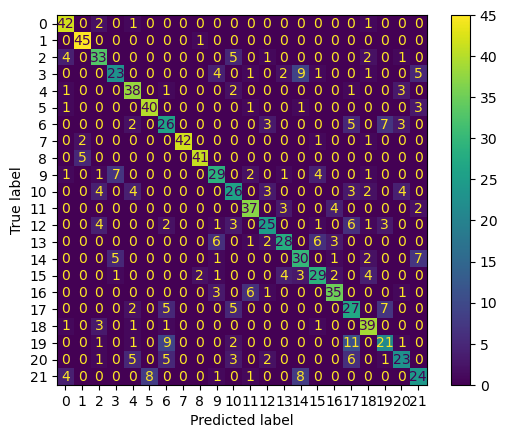

In [18]:
#Predictions
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

# Get the accuracy, precision and recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

In [60]:
# ##Split by class, to increment by class:
# #Get dataframe of class 1,2,3,4,5,6,7
# df1=df.loc[df['y'].isin([1,2,3,4,5,6,7])]
# Y1=df1['y']
# X1=df1.drop(['y'],axis=1)

# #Get dataframe of class 8,9,10
# df2=df.loc[df['y'].isin([8,9,10])]
# Y2=df2['y']
# X2=df2.drop(['y'],axis=1)

# #Get dataframe of class 11,12,13
# df3=df.loc[df['y'].isin([11,12,13])]
# Y3=df3['y']
# X3=df3.drop(['y'],axis=1)

# #Get dataframe of class 14,15,16
# df4=df.loc[df['y'].isin([14,15,16])]
# Y4=df4['y']
# X4=df4.drop(['y'],axis=1)

# #Get dataframe of class 17,18,19
# df5=df.loc[df['y'].isin([17,18,19])]
# Y5=df5['y']
# X5=df5.drop(['y'],axis=1)

# #Get dataframe of class 20,21,22
# df6=df.loc[df['y'].isin([20,21,22])]
# Y6=df6['y']
# X6=df6.drop(['y'],axis=1)

# #Train test split
# X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, Y1, test_size=0.2, random_state=1, shuffle=True)
# X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, Y2, test_size=0.2, random_state=1, shuffle=True)
# X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, Y3, test_size=0.2, random_state=1, shuffle=True)
# X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, Y4, test_size=0.2, random_state=1, shuffle=True)
# X_train5, X_test5, y_train5, y_test5 = train_test_split(X5, Y5, test_size=0.2, random_state=1, shuffle=True)
# X_train6, X_test6, y_train6, y_test6 = train_test_split(X6, Y6, test_size=0.2, random_state=1, shuffle=True)

5060 5060
Fitting from a partial_fit call
building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 25 of 50building tree 26 of 50

building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.3s finished
c:\Users\Martin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:452: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  elif n_more_estimators == 0:
c:\Users\Martin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\Users\Martin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\Users\Martin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\Users\Martin\AppData

Fitting from a partial_fit call
50


c:\Users\Martin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\Users\Martin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\Users\Martin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\Users\Martin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\Users\Martin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without f

0.6531620553359684


c:\Users\Martin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\Users\Martin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\Users\Martin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\Users\Martin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\Users\Martin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without f

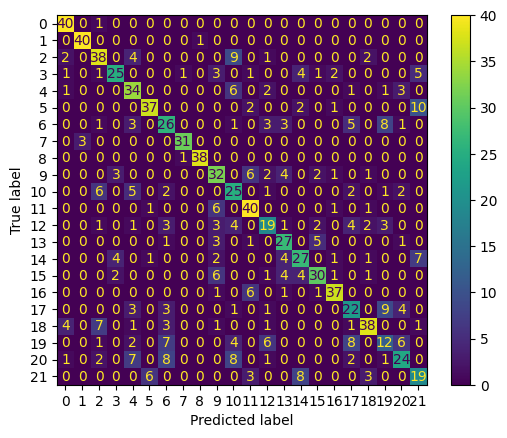

In [ ]:
#%pip install incremental_trees

from incremental_trees.models.classification.streaming_rfc import StreamingRFC
print(len(X),len(Y))
# Generate some data in memory
srfc = StreamingRFC(n_estimators_per_chunk=50,
                    max_n_estimators=np.inf,
                    spf_n_fits=22,  # Number of calls to .partial_fit()
                    spf_sample_prop=0.05,
                    max_features='sqrt',
                    n_jobs=-1,
                    verbose=2)  # Number of rows to sample each on .partial_fit()

srfc.fit(X_train, y_train, sample_weight=np.ones_like(y_train))  # Optional, gets sampled along with the data  # Optional, gets sampled along with the data

# Should be n_estimators_per_chunk * spf_n_fits
print(len(srfc.estimators_))
print(srfc.score(X_test, y_test))
cm = confusion_matrix(y_test,srfc.predict(X_test))
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [156]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split
#Y = Y.astype('int')
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

# Filter data to only include examples from the first 7 classes
#train_mask = y_train.isin([1, 2, 3, 4, 5, 6, 7])

#X_train_filtered = X_train[train_mask]
#y_train_filtered = y_train[train_mask].astype('str')
# Train a random forest classifier on the filtered training data
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100 ,warm_start =True, n_jobs=-1)

#rf.fit(X_train_filtered, y_train_filtered)
# now do a warm start with the filtered model to train the remaining classes
rf.n_estimators = 0
rf.warm_start =True
# filter the train data
for i in range(1, 11):
    rf.n_estimators += 100
    indinf = ((i-1)*X_train.shape[0])//10
    indsup = (i*X_train.shape[0])//10
    X_train_filtered = X_train[indinf:indsup]
    y_train_filtered = y_train[indinf:indsup]
    # train the model
    rf.fit(X_train_filtered, y_train_filtered)
    print(rf.n_classes_)
    y_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(accuracy)

# Evaluate the model
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)



22
0.5503952569169961
22
0.5938735177865613
22
0.607707509881423
22
0.6175889328063241
22
0.6205533596837944
22
0.6215415019762845
22
0.6314229249011858
22
0.6413043478260869
22
0.6403162055335968
22
0.6511857707509882
0.6511857707509882


In [165]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split
Y = Y.astype('int')
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

# Filter data to only include examples from the first 7 classes
train_mask = y_train.isin([1, 2, 3, 4, 5, 6, 7])

X_train_filtered = X_train[train_mask]
y_train_filtered = y_train[train_mask].astype('str')
# Train a random forest classifier on the filtered training data
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100 ,warm_start =True, n_jobs=-1)

rf.fit(X_train_filtered, y_train_filtered)
# now do a warm start with the filtered model to train the remaining classes

# filter the train data
for i in range(8, 23):
    rf.n_classes_ = rf.n_classes_ +1
    rf.set_params(n_estimators = rf.n_estimators+100)
    # indinf = ((i-1)*X_train.shape[0])//10
    # indsup = (i*X_train.shape[0])//10
    train_mask= y_train.isin([i])
    X_train_filtered = X_train[train_mask]
    y_train_filtered = y_train[train_mask]
    # train the model
    rf.fit(X_train_filtered, y_train_filtered)
    print(rf.n_classes_)
    y_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(accuracy)

# Evaluate the model
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)



TypeError: BaseForest.fit() got an unexpected keyword argument 'n_classes_'